In [7]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler

countries = CountryMetaDataFile().readMetadata()
dl = DataLib("SignalData")

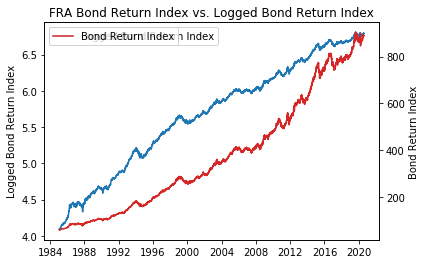

In [8]:
# Setting up Bond Return Index variables
BondReturnIndex = dl.pull('BondRetIdx/LocalFX') # daily, represents accumulated returns from holding 10-year bonds
average = 'Equal Weighted Mean'
BondReturnIndex[average] = BondReturnIndex.mean(axis=1) # global average
MonthlyBondReturnIndex = BondReturnIndex.resample('1M').mean()

country = 'FRA'

# Bond Return Index vs. Logged Bond Return Index
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Logged Bond Return Index'
ax1.plot(np.log(BondReturnIndex[country]).to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Bond Return Index'
ax2.plot(BondReturnIndex[country].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title(f'{country} Bond Return Index vs. Logged Bond Return Index')
plt.show()

# Indicator 1: Bond Premium

* What it is: difference between the long rate and short rate
* What it means: reflects the slope of the yield curve
* What it tells us: the greater the bond premium, the greater the spread between long and short rates
* What we expect: typically the bond premium is positive (meaning that long rates > short rates) since there is more risk associated with holding bonds for longer
* What this tells us about bonds: steepening yield curves attracts investors with long positions

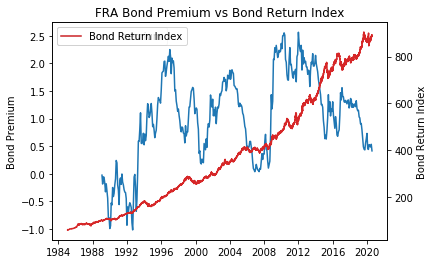

In [9]:
# Calculating Bond Premium for all countries
ShortRates = dl.pull('ShortRates') # monthly
LongRates = dl.pull('LongRates') # monthly, nominal yield on 10-year govenment issued bonds
BondPremium = LongRates - ShortRates
BondPremium[average] = BondPremium.mean(axis=1) # global average

country = 'FRA'

# Bond Premium vs. Bond Returns
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Bond Premium'
ax1.plot(BondPremium[country].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Bond Return Index'
ax2.plot(BondReturnIndex[country].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title(f'{country} Bond Premium vs Bond Return Index')
plt.show()

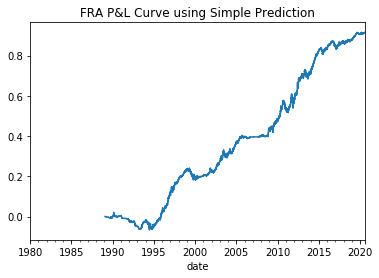

                FRA  Bond Premium  6M Rolling BP  6M Rolling BP Global Avg  \
date                                                                         
1980-01-01      NaN           NaN            NaN                       NaN   
1980-01-02      NaN           NaN            NaN                       NaN   
1980-01-03      NaN           NaN            NaN                       NaN   
1980-01-04      NaN           NaN            NaN                       NaN   
1980-01-07      NaN           NaN            NaN                       NaN   
1980-01-08      NaN           NaN            NaN                       NaN   
1980-01-09      NaN           NaN            NaN                       NaN   
1980-01-10      NaN           NaN            NaN                       NaN   
1980-01-11      NaN           NaN            NaN                       NaN   
1980-01-14      NaN           NaN            NaN                       NaN   
1980-01-15      NaN           NaN            NaN                

,Bond Premium,Simple Prediction
date,,
1990-03-30,-0.530,-0.206708
1990-04-02,-0.566,-0.220749
1990-04-03,-0.566,-0.220749
1990-04-04,-0.566,-0.220749
1990-04-05,-0.566,-0.220749
1990-04-06,-0.566,-0.220749
1990-04-09,-0.566,-0.220749
1990-04-10,-0.566,-0.220749
1990-04-11,-0.566,-0.220749


In [26]:
# Takes in a country and returns prediction dataframe
def BondPremiumIndicator(country):
    
    # Set up dataframe, rows are business days
    countryData = pd.DataFrame(BondReturnIndex[country])
    
    # Before inserting data into dataframe, upsample to business days to match Bond Return Index
    countryData['Bond Premium'] = BondPremium[country].resample('B').ffill()
    countryData['6M Rolling BP'] = (BondPremium[country].rolling(6).mean()).resample('B').ffill()
    countryData['6M Rolling BP Global Avg'] = (BondPremium[average].rolling(6).mean()).resample('B').ffill()
    
    # Simple prediction looks only at Bond Premium and scales it
    # LOGIC: The bigger the Bond Premium, the steeper the yield curve, the bigger our long position
    # LOGIC: If the Bond Premium is positive, our position should be positive (long)
    scaler = MaxAbsScaler()
    countryData['Simple Prediction'] = scaler.fit_transform(countryData['Bond Premium'].values.reshape(-1,1))
    
    # Better prediction needs to consider change over time and local/global context
    # WORKING ON THIS NOW
    
    # Calculate P&L
    countryData = PandLAnalysis(countryData, country)

    return countryData


# Calculate and display P&L values from prediction dataframe
def PandLAnalysis(data, country):
    
    data['P&L'] = data['Simple Prediction'] * data[country].shift(1).pct_change()
    
    # Plot P&L Curve
    data['P&L'].cumsum().plot()
    plt.title(f'{country} P&L Curve using Simple Prediction')
    plt.show()
    
    return data

country = 'FRA'
results = BondPremiumIndicator(country)
print(results)